In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","CLIP LENGTH","OFFSET","DURATION","MAX FREQ","MIN FREQ","SAMPLE RATE"])

In [4]:
CLIP_LENGTHS = frame.groupby("IN FILE")[["CLIP LENGTH"]].max()

In [5]:
SUM_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].sum()

In [6]:
MEDIAN_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].median()
MEDIAN_DURATIONS = MEDIAN_DURATIONS.rename(columns={'DURATION': 'MEDIAN DURATION'})

In [7]:
NUMBER_ANN = frame.groupby("IN FILE")[["OFFSET"]].count()
NUMBER_ANN = NUMBER_ANN.rename(columns = {'OFFSET':'OFFSET COUNT'})

In [8]:
MED_DIST_BW_ANNS = frame.copy(True)

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.sort_values(['IN FILE','OFFSET'])
MED_DIST_BW_ANNS['ENDSET'] = MED_DIST_BW_ANNS['OFFSET'] + MED_DIST_BW_ANNS['DURATION']

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS[['IN FILE','CLIP LENGTH','OFFSET','ENDSET']]

MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS.loc[MED_DIST_BW_ANNS['IN FILE'].shift(-1) == MED_DIST_BW_ANNS['IN FILE'], 'ENDSET']
MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS['PREV END'].shift()

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.fillna(0)
MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] = MED_DIST_BW_ANNS['OFFSET'] - MED_DIST_BW_ANNS['PREV END']

MED_DIST_BW_ANNS['OVERLAP'] = MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'].loc[MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] < 0]

In [9]:
OVER_LAP = MED_DIST_BW_ANNS.groupby('IN FILE')[['OVERLAP']].count()
OVER_LAP = OVER_LAP.rename(columns = {'OVERLAP':'OVERLAP COUNT'})

In [10]:
DIST_BETWEEN_ANN_PREV = MED_DIST_BW_ANNS.groupby('IN FILE')[['DIST BETWEEN ANN PREV']].median()
DIST_BETWEEN_ANN_PREV = DIST_BETWEEN_ANN_PREV.rename(columns={'DIST BETWEEN ANN PREV': 'MEDIAN DIST B/W ANNS'})

In [11]:
WHITE_SPACE = frame.copy(True)
DUR = WHITE_SPACE.groupby(['IN FILE'])[['DURATION']].sum()
DUR = DUR.rename(columns = {'DURATION':'SUM DURATION'})
LEN = WHITE_SPACE.groupby(['IN FILE'])[['CLIP LENGTH']].max()
WHITE_SPACE = LEN.join(DUR)
WHITE_SPACE['WHITE SPACE'] = WHITE_SPACE['CLIP LENGTH'] - WHITE_SPACE['SUM DURATION']

In [12]:
WHITE_SPACE = WHITE_SPACE.join(OVER_LAP)
WHITE_SPACE = WHITE_SPACE.join(DIST_BETWEEN_ANN_PREV)
WHITE_SPACE = WHITE_SPACE.join(MEDIAN_DURATIONS)
WHITE_SPACE = WHITE_SPACE.join(NUMBER_ANN)
WHITE_SPACE.reset_index(inplace=True)
WHITE_SPACE

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8
...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3


In [13]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    # print(spec)
    # print(spec[:-1])
    spec_to = '-'.join(spec[:-2])
    return spec_to

WHITE_SPACE['Genus'] = WHITE_SPACE.apply (lambda row: species(row), axis=1)

# diff_genus = frame[frame['Genus']].value_counts().index_values()#.to_list()
# print(diff_genus[:3])

# WHITE_SPACE = WHITE_SPACE[(WHITE_SPACE['Genus'] ==  'Himantopus-mexicanus') | (WHITE_SPACE['Genus'] ==  'Ramphocaenus-sticturus')] # or 
len(WHITE_SPACE['Genus'].unique())
WHITE_SPACE

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,Genus
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,Aburria
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,Aburria
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,Accipiter
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,Accipiter
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,Accipiter
...,...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4,Zimmerius
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21,Zimmerius
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17,Zonotrichia
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3,Zonotrichia


In [14]:
# pca_data['IN FILE']=pd.Categorical(pca_data['IN FILE'])
# my_color=pca_data['IN FILE'].cat.codes

X = WHITE_SPACE.drop(columns = ['IN FILE','Genus'])

Y = np.array(WHITE_SPACE['Genus'])
len(Y)

2443

In [15]:
X

,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT
0,24.63350,8.7813,15.85220,0,2.36140,3.32050,3
1,84.48000,9.4200,75.06000,0,26.76000,3.14000,3
2,5.66857,4.6442,1.02437,3,0.00000,0.21550,20
3,45.37470,7.6708,37.70390,0,5.19555,1.03010,8
4,26.93220,4.8604,22.07180,1,1.03060,0.57010,8
...,...,...,...,...,...,...,...
2438,12.19920,3.2975,8.90170,0,1.48075,0.81325,4
2439,27.55920,10.8399,16.71930,0,0.68000,0.52000,21
2440,98.85600,31.5518,67.30420,0,3.73360,1.70010,17
2441,18.25960,7.7298,10.52980,0,3.01990,2.35990,3


In [16]:
len(Y)

2443

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X)
X_standardized = scaler.transform(X)
X_standardized = pd.DataFrame(X_standardized, columns = X.columns)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6, random_state = 0)
pca.fit(X_standardized)
X_dim_reducted = pca.transform(X_standardized)
X_dim_reducted

array([[-0.71294525,  0.35848707,  0.56694143,  0.10122985, -0.25513868,
         0.04189677],
       [ 1.70831859,  3.80248116, -0.8566543 ,  2.67362394,  1.14526387,
         0.19557623],
       [-0.91913383, -1.24842282, -0.4541633 ,  0.30815556, -0.04157813,
         0.17914997],
       ...,
       [ 2.14783924,  0.65063545, -0.03618134, -0.51815381, -0.14326161,
        -0.32800658],
       [-0.92197595,  0.2729909 ,  0.27041941,  0.15819108, -0.03188663,
        -0.06375334],
       [ 0.41904371,  1.63111639, -0.43691857,  0.8801086 ,  0.18249796,
        -0.00600767]])

In [19]:
boba = pd.DataFrame(X_dim_reducted, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
boba

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-0.712945,0.358487,0.566941,0.101230,-0.255139,0.041897
1,1.708319,3.802481,-0.856654,2.673624,1.145264,0.195576
2,-0.919134,-1.248423,-0.454163,0.308156,-0.041578,0.179150
3,0.049454,0.677315,-0.515589,0.133121,-0.099598,-0.018630
4,-0.607152,-0.160026,-0.450342,-0.073785,-0.363433,-0.104832
...,...,...,...,...,...,...
2438,-1.201450,-0.038395,-0.258561,-0.082562,-0.101911,-0.114834
2439,-0.278987,-0.553867,-0.353281,-0.364901,0.195263,0.295597
2440,2.147839,0.650635,-0.036181,-0.518154,-0.143262,-0.328007
2441,-0.921976,0.272991,0.270419,0.158191,-0.031887,-0.063753


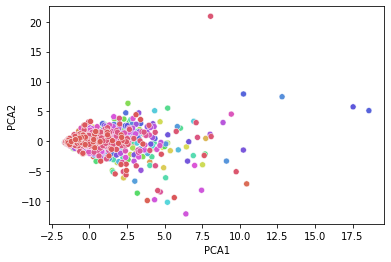

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'PCA1', y='PCA2',hue = Y, palette=sns.color_palette("hls", 515), data = boba, legend = False)
plt.show()

In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_standardized) 

C:\Users\lianl\anaconda3\envs\tweety\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lianl\anaconda3\envs\tweety\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2443 samples in 0.005s...
[t-SNE] Computed neighbors for 2443 samples in 0.245s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2443
[t-SNE] Computed conditional probabilities for sample 2000 / 2443
[t-SNE] Computed conditional probabilities for sample 2443 / 2443
[t-SNE] Mean sigma: 0.198836
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.441032
[t-SNE] KL divergence after 300 iterations: 0.908177


In [23]:
tsneed = pd.DataFrame(tsne_results, columns = ['TSNE1','TSNE2','TSNE3']) # ,'TSNE4','TSNE5','TSNE6'
tsneed

,TSNE1,TSNE2,TSNE3
0,-3.699374,2.402111,-2.102303
1,-1.030149,8.711246,3.716187
2,3.373241,-4.714645,-5.239885
3,-0.829720,1.638806,5.147428
4,0.299129,-4.760780,3.298485
...,...,...,...
2438,-4.000903,-5.388359,-0.313045
2439,4.926737,-2.585036,0.411771
2440,3.569412,5.904851,1.642508
2441,-4.710129,0.480875,-0.960584


In [24]:
Y

array(['Aburria', 'Aburria', 'Accipiter', ..., 'Zonotrichia',
       'Zonotrichia', 'Zonotrichia'], dtype=object)

In [25]:
import plotly.express as px

# plt.figure(figsize=(16,10))
# ['Alphabet',
#  'Antique',
#  'Bold',
#  'D3',
#  'Dark2',
#  'Dark24',
#  'G10',......]

fig = px.scatter(tsneed,x="TSNE1", y="TSNE2",color = Y,color_discrete_sequence= px.colors.qualitative.G10) #legend = "Full", palette=sns.color_palette("hls", 947)
fig.show()

In [26]:
import plotly.express as px 

fig = px.scatter_3d(tsneed, x="TSNE1", y="TSNE2", z='TSNE3',color = Y, color_discrete_sequence= px.colors.qualitative.G10)

fig.show()

In [27]:
# from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components = 3)
# gm.fit(X_standardized)

# y_cluster_gmm = gm.predict(X_standardized)
# y_cluster_gmm

# from sklearn.metrics.cluster import adjusted_rand_score

# score = adjusted_rand_score(Y, y_cluster_gmm)
# score



In [28]:
# from sklearn.cluster import KMeans

In [29]:
# kmeans = KMeans(n_clusters = 3)
# kmeans.fit(X_standardized)

In [30]:
# y_cluster_kmeans = kmeans.predict(X_standardized)
# y_cluster_kmeans

In [31]:
# score = adjusted_rand_score(Y, y_cluster_kmeans)
# score